In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import from SIPPY library
from sippy import functionset as fset

# Data Generation 
(Data Collection in real life situtation)

In [3]:
# Single-Input-Single-Output State-Space system
# For 2 state variables
A = np.array([[0.89, 0.], [0., 0.45]])
B = np.array([[0.3], [2.5]])
C = np.array([[0.7, 1.]])
D = np.array([[0.0]])

In [4]:
# Sampling time
ts = 1.0

In [5]:
tstart = 0
tend = 500
npts = int(tend/ts) + 1

# Creating time vector
Time = np.linspace(tstart, tend, npts)

In [6]:
U = np.zeros((1, npts))
[U[0],_,_] = fset.GBN_seq(npts, 0.05)

Text(0.5, 0, 'Time')

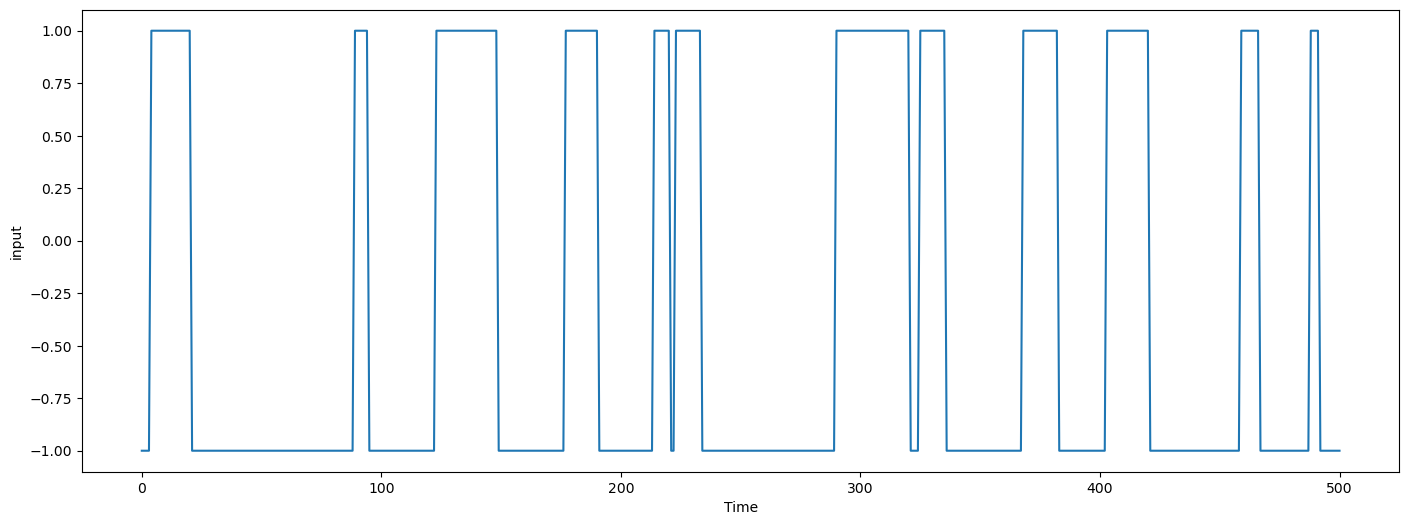

In [7]:
plt.figure(figsize=(17, 6))
plt.plot(Time, U[0])
plt.ylabel("input")
plt.xlabel("Time")

In [8]:
from sippy import functionsetSIM as fsetSIM

x, yout = fsetSIM.SS_lsim_process_form(A, B, C, D, U)

In [9]:
# measurement noise
noise = fset.white_noise_var(npts, [0.15])

In [10]:
# Output with noise
y_tot = yout + noise

Text(0.5, 1.0, 'Ytot')

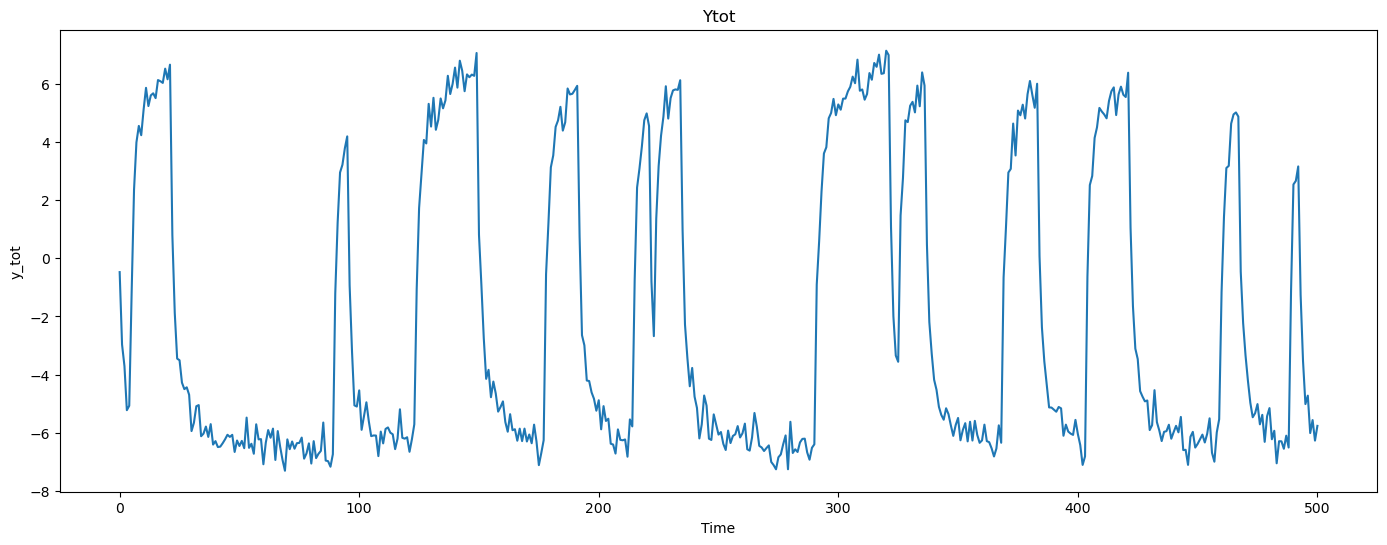

In [11]:
plt.figure(figsize=(17, 6))
plt.plot(Time, y_tot[0])
plt.ylabel("y_tot")
plt.xlabel("Time")
plt.title("Ytot")

# Performing System Identification

In [12]:
from sippy import system_identification

In [13]:
METHOD = [
    'N4SID',
    'CVA', 
    'MOESP', 
    'PARSIM-S', 
    'PARSIM-P', 
    'PARSIM-K'
    ]

lege = ['System']

A = [[0.59945359 0.1822286 ]
 [0.25073189 0.71678568]] , 

B = [[-0.11369602]
 [ 0.06070814]], 

C = [[-21.56981492   4.41289744]], 

D = [[0.]]


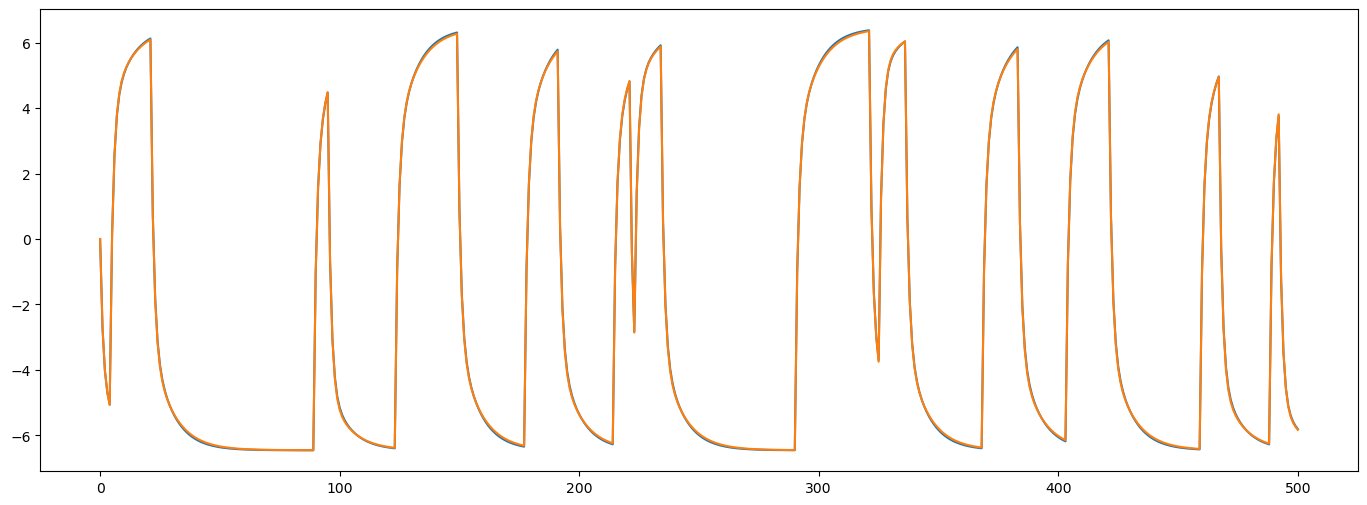

In [14]:
sysId = system_identification(y_tot, U, 'N4SID', SS_fixed_order=2)

print(f'A = {sysId.A} , \n\nB = {sysId.B}, \n\nC = {sysId.C}, \n\nD = {sysId.D}')

x_id, y_id = fsetSIM.SS_lsim_process_form(sysId.A, sysId.B, sysId.C, sysId.D, U, sysId.x0);
plt.figure(figsize=(17, 6))
plt.plot(Time, y_id[0])
plt.plot(Time, yout[0])

In [15]:
sysId.G

<LinearIOSystem:sys[2]:['u[0]']->['y[0]']>